<a href="https://colab.research.google.com/github/govind527/Pytorch_Practice/blob/main/pytorch_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import torch
from torch import nn
import matplotlib.pyplot as plt
torch.__version__

'2.6.0+cu124'

In [45]:
weight=0.7
bias=0.3
## create a range of numbers
start =0
end =1
step=0.02
X=torch.arange(start,end,step).unsqueeze(dim=1)
y=weight*X+bias
X[:10],y[:10]


(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [46]:
#create a train/test split
train_split=int(0.8*len(X))
X_train,y_train=X[:train_split],y[:train_split]
X_test,y_test=X[train_split:],y[train_split:]
len(X_train),len(y_train)

(40, 40)

In [47]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
    plt.figure(figsize=(10,7))
    """ train and test data comparions
    """
    plt.scatter(train_data,train_labels,c="b",s=4,label="training data")
    plt.scatter(test_data,test_labels,c="g",s=4,label="test data")

    if predictions is not None:

        plt.scatter(test_data,predictions,c="r",s=4,label="preditions")

    plt.legend(prop={"size":14});

##plt.show()



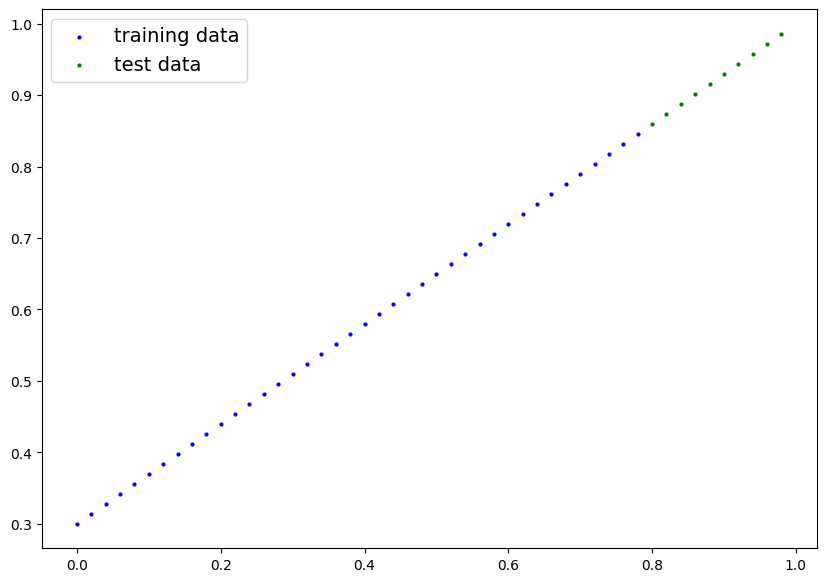

In [48]:
plot_predictions()

In [49]:
## our first pytorch model we will doing linear regeression

class LinearRegressionModel(nn.Module):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.weights=nn.Parameter(torch.randn(1,
                                              requires_grad=True,
                                              dtype=torch.float))
        self.bias=nn.Parameter(torch.randn(1,
                                           requires_grad=True,
                                           dtype=torch.float))

    def forward(self,x:torch.Tensor):
        return self.weights*x+self.bias

In [50]:
torch.manual_seed(42)
Model_0=LinearRegressionModel()
list(Model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [51]:
Model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [52]:
with torch.inference_mode():
  y_preds=Model_0(X_test)
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [53]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

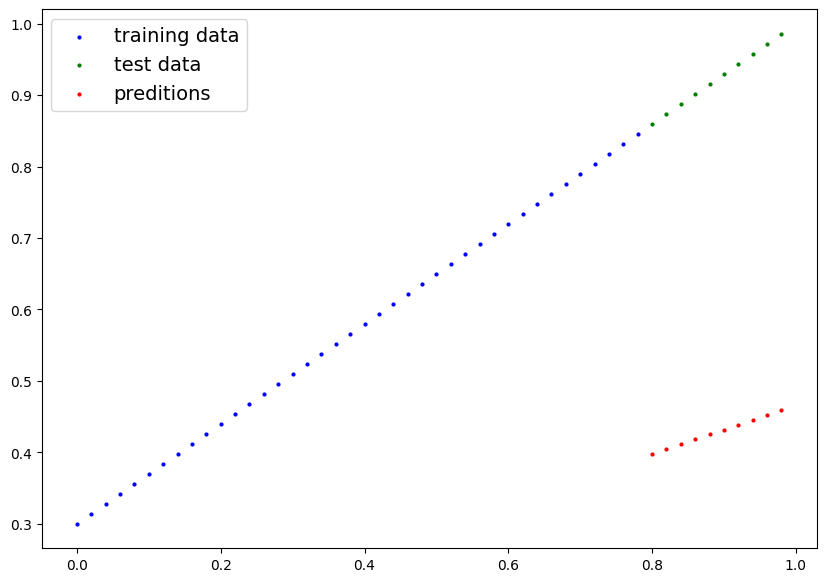

In [54]:
plot_predictions(predictions=y_preds)

In [55]:
##Train a model
## unknown parameters to known parameters(poor to good representation)

Model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [56]:
## setup a loss function
loss_fn=nn.L1Loss()


## setup an optimizer

optimizer=torch.optim.SGD(params=Model_0.parameters(),lr=0.01)

In [57]:
## training loop building and testing loop
print(loss_fn)


L1Loss()


In [59]:
torch.manual_seed(42)

epochs=200

## Tracking experiment
epoch_count=[]
loss_values=[]
test_loss_values=[]


### training
## 0. loop through data

for epoch in range(epochs):
    Model_0.train()
    ## 1.forwar pass
    y_pred=Model_0(X_train)
    ##2. calculate the loss
    loss=loss_fn(y_pred,y_train)
    ##3.optimizer zero grad
    optimizer.zero_grad()

    ##4. backpropagation
    loss.backward()

    ## 5.step the optimizer
    optimizer.step()

    Model_0.eval()

    with torch.inference_mode():
        ## 1.forward pass
        test_pred=Model_0(X_test)
        test_loss=loss_fn(test_pred,y_test)
        if epoch%10==0:
            epoch_count.append(epoch)
            loss_values.append(loss)
            test_loss_values.append(test_loss)
            print(f"epoch: {epoch} | loss: {loss} | test_loss: {test_loss}")
            print(Model_0.state_dict())


epoch: 0 | loss: 0.024458957836031914 | test_loss: 0.05646304413676262
OrderedDict([('weights', tensor([0.5800])), ('bias', tensor([0.3503]))])
epoch: 10 | loss: 0.021020207554101944 | test_loss: 0.04819049686193466
OrderedDict([('weights', tensor([0.5972])), ('bias', tensor([0.3433]))])
epoch: 20 | loss: 0.01758546568453312 | test_loss: 0.04060482233762741
OrderedDict([('weights', tensor([0.6141])), ('bias', tensor([0.3358]))])
epoch: 30 | loss: 0.014155393466353416 | test_loss: 0.03233227878808975
OrderedDict([('weights', tensor([0.6313])), ('bias', tensor([0.3288]))])
epoch: 40 | loss: 0.010716589167714119 | test_loss: 0.024059748277068138
OrderedDict([('weights', tensor([0.6485])), ('bias', tensor([0.3218]))])
epoch: 50 | loss: 0.0072835334576666355 | test_loss: 0.016474086791276932
OrderedDict([('weights', tensor([0.6654])), ('bias', tensor([0.3143]))])
epoch: 60 | loss: 0.0038517764769494534 | test_loss: 0.008201557211577892
OrderedDict([('weights', tensor([0.6826])), ('bias', te

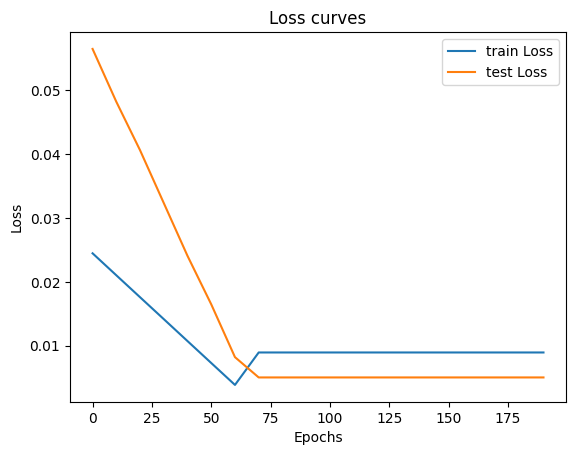

In [64]:
## plot loss curves
plt.plot(epoch_count,torch.tensor(loss_values).numpy(),label="train Loss")
plt.plot(epoch_count,test_loss_values,label="test Loss")
plt.title("Loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [60]:
with torch.inference_mode():
  y_preds_new=Model_0(X_test)
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

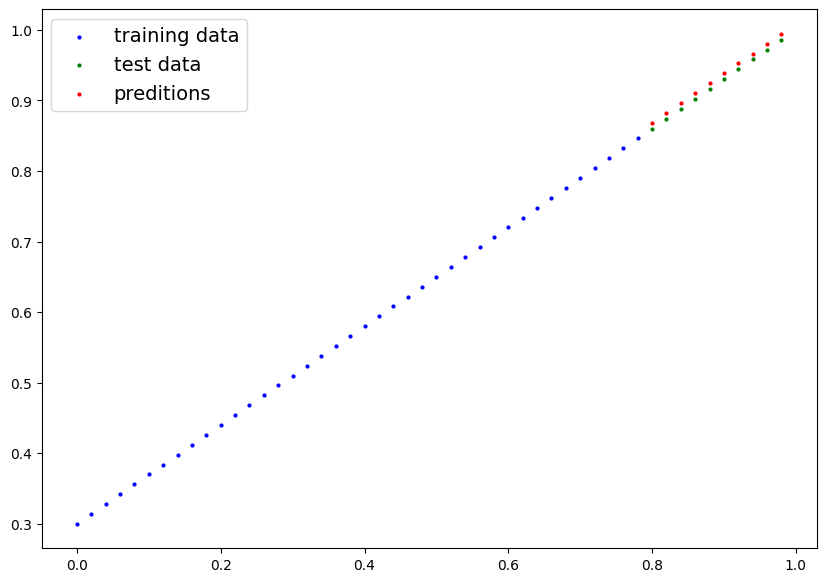

In [61]:
plot_predictions(predictions=y_preds_new)

In [62]:
Model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])